<a href="https://colab.research.google.com/github/vchandraiitk/datascience/blob/main/Vikas_M3_NB_MiniProject_2_Credit_risk_modelling_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Credit risk modelling using Logistic Regression

## Problem Statement

Predict the loan defaulters using a Logistic Regression model on the credit risk data and calculate credit scores

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration, preprocessing and visualization
* implement Logistic Regression using manual code or using sklearn library
* evaluate the model using appropriate performance metrics
* develop a credit scoring system

## Dataset

The dataset chosen for this mini-project is the [Give Me Some Credit](https://cdn.iisc.talentsprint.com/CDS/Give_me_some_credit_BigML.pdf) dataset which can be used to build models for predicting loan repayment defaulters
#### Datafields

- **SeriousDlqin2yrs:** Person experienced 90 days past due delinquency or worse
- **RevolvingUtilizationOfUnsecuredLines:** Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
- **age:** Age of borrower in years
- **NumberOfTime30-59DaysPastDueNotWorse:** Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
- **DebtRatio:** Monthly debt payments, alimony,living costs divided by monthy gross income
- **MonthlyIncome:** Monthly income
- **NumberOfOpenCreditLinesAndLoans:** Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
- **NumberOfTimes90DaysLate:** Number of times borrower has been 90 days or more past due.
- **NumberRealEstateLoansOrLines:**	Number of mortgage and real estate loans including home equity lines of credit
- **NumberOfTime60-89DaysPastDueNotWorse:**	Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
- **NumberOfDependents:** Number of dependents in family excluding themselves (spouse, children etc.)

## Information

Credit risk arises when a corporate or individual borrower fails to meet their debt obligations. From the lender's perspective, credit risk could disrupt its cash flows or increase collection costs, since the lender may be forced to hire a debt collection agency to enforce the collection. The loss may be partial or complete, where the lender incurs a loss of part of the loan or the entire loan extended to the borrower.

Credit scoring algorithms, which calculate the probability of default, are the best methods that banks use to determine whether or not a loan should be granted.

In order to build a credit scoring system, the following feature transformations are performed:

#### Weight of Evidence and Information value

Logistic regression is a commonly used technique in credit scoring for solving binary classification problems. Prior to model fitting, another iteration of variable selection is valuable to check if the newly WOE transformed variables are still good model candidates. Preferred candidate variables are those with higher information value having a linear relationship with the dependent variable, have good coverage across all categories, have a normal distribution, contain a notable overall contribution, and are relevant to the business.

**Weight of evidence** (WOE) is a powerful tool for feature representation and evaluation in data science. WOE can provide interpret able transformation to both categorical and numerical features. The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable. Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers. "Bad Customers" refers to the customers who defaulted on a loan. and "Good Customers" refers to the customers who paid back loan. WOE can be calculated using the below formula:

$$WOE = ln \left( \frac{\%   of  Non\_Events}{\%   of  Events} \right)$$

Steps to calculate WOE
* For a continuous variable, split data into 10 parts (or lesser depending on the distribution).
* Calculate the number of events and non-events in each group (bin)
* Calculate the % of events and % of non-events in each group.
* Calculate WOE by taking natural log of division of % of non-events and % of events

**Information value** is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance. The IV is calculated using the following formula :
$$IV = ∑ (\% of Non\_Events - \% of Events) * WOE$$

Read more about `WOE` and `IV` from the following [link](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_NB_MiniProject_2_Credit_risk_modelling_Logistic_Regression_WoE_and_IV.pdf)

## Grading = 10 Points

### Download the dataset

In [1]:
#@title Download Dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/GiveMeSomeCredit.csv
!pip -qq install xverse
print("Data Downloaded Successfully!")

Data Downloaded Successfully!


### Install Packages

In [ ]:
!pip install pandas==1.3.5

In [ ]:
!pip install xverse

### Import Neccesary Packages

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt
import math
from xverse.transformer import MonotonicBinning,WOE
%matplotlib inline

### Load the dataset

In [16]:
# YOUR CODE HERE (T-1)
df = pd.read_csv("/content/GiveMeSomeCredit.csv")
df.head(5)
#df.dtypes

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


#### Describe the all statistical properties of the train dataset
-------- **Comments from Team-15** --------

**1. Examine Basic Information:** Check the basic structure, including data types and non-null counts.

**2. Descriptive Statistics:** Compute basic statistical measures like mean, median, standard deviation, etc.

**3. Distribution Analysis:** Plot distributions to understand the data spread.

**4. Correlation Analysis:** Check for correlations between features.

In [20]:
# YOUR CODE HERE (T-2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         150000 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

          Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
count  150000.000000     150000.000000                         150000.000000   
mean    75000.500000          0.066840                              6.048438   
std     43301.414527          0.249746                            249.755371   
min         1.000000          0.000000                              0.000000   
25%     37500.750000          0.000000                              0.029867   
50%     75000.500000          0.000000                              0.154181   
75%    112500.250000          0.000000                              0.559046   
max    150000.000000          1.000000                          50708.000000   

                 age  NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  \
count  150000.000000                         150000.000000  150000.000000   
mean       52.295207                              0.421033     353.005076   
std        14.771866                            

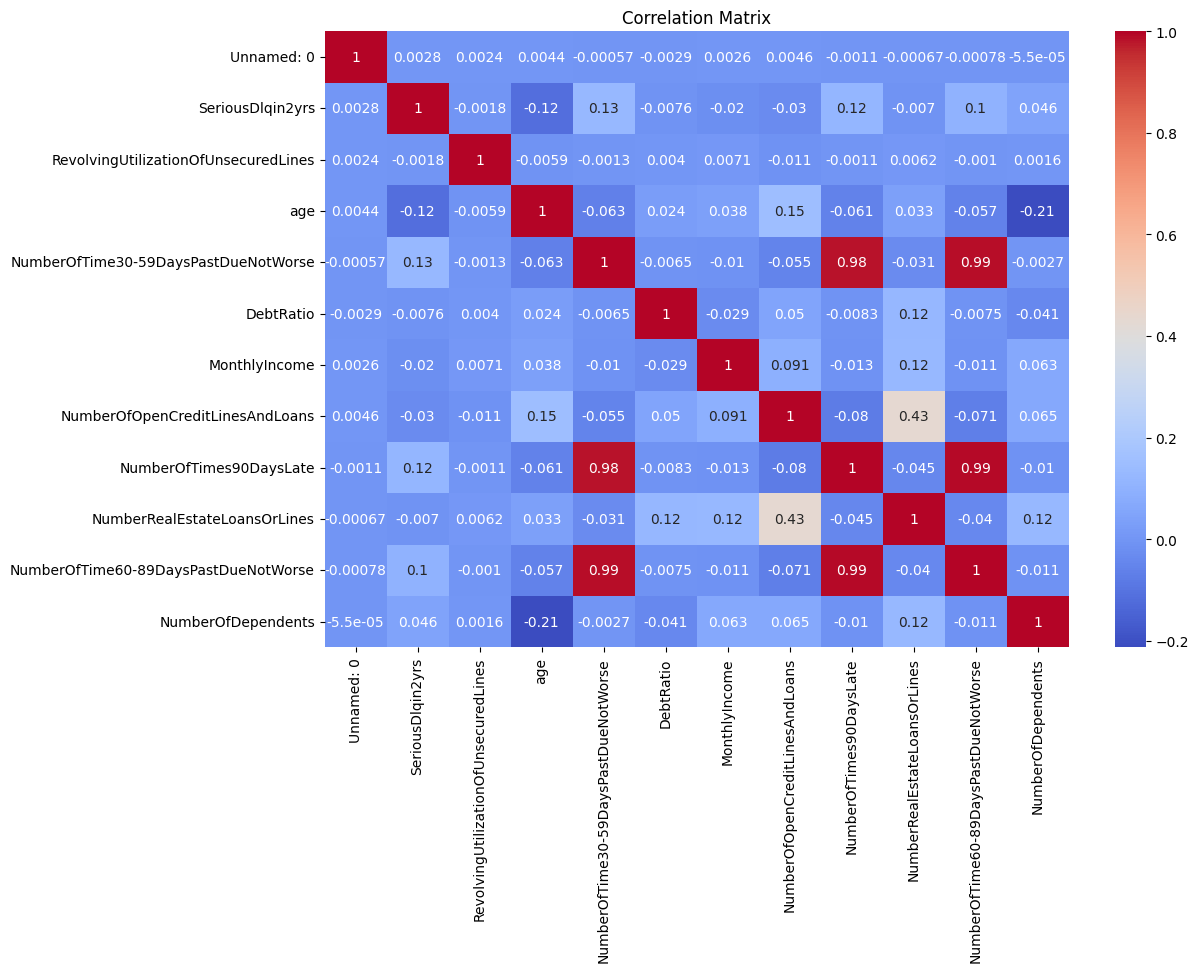

In [17]:

# for column in df.select_dtypes(include=['float64', 'int64']).columns:
#     plt.figure(figsize=(10, 4))
#     sns.histplot(df[column], kde=True)
#     plt.title(f'Distribution of {column}')
#     plt.show()
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Pre-processing (1 point)

#### Remove unwanted columns

In [26]:
# YOUR CODE HERE (T-3)
df = df.drop(columns=['Unnamed: 0', 'NumberOfDependents'])
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse'],
      dtype='object')

#### Handle the missing data

Find the how many null values in the dataset and fill with mean or remove.

In [19]:
# YOUR CODE HERE (T-4)
df["MonthlyIncome"] = df['MonthlyIncome'].fillna(df["MonthlyIncome"].mean())

### EDA &  Visualization ( 1 point)

#### Calculate the percentage of the target lebels and visualize with a graph

In [ ]:
# YOUR CODE HERE (T-5)

#### Plot the distribution of SeriousDlqin2yrs by age

In [ ]:
# YOUR CODE HERE (T-6)

#### Calculate the correlation and plot the heatmap

In [ ]:
# YOUR CODE HERE (T-7)

### Data Engineering (2 points)

#### Weight of Evidence and Information value

* Arrange the binning for each variable with different bins
    * For eg. Age = 49, Age_quantile_range = (48, 56)
* Calculate information value and chooose the best features based on the rules given below

| Information Value |	Variable Predictiveness |
| --- | --- |
| Less than 0.02	|  Not useful for prediction |
| 0.02 to 0.1	| Weak predictive Power |
|  0.1 to 0.3 | Medium predictive Power |
| 0.3 to 0.5 | Strong predictive Power |
| >0.5 | Suspicious Predictive Power |

* Calculate Weight of evidence for the selected variables

Hint: Use [xverse](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_NB_MiniProject_2_Credit_risk_modelling_Logistic_Regression_Xverse.pdf). It is a machine learning Python module in the space of feature engineering, feature transformation and feature selection. It provides pre-built functions for the above steps, such as binning and conversion to WoE.

In [ ]:
# YOUR CODE HERE (T-8)

### Identify features,  target and split it into train and test

In [ ]:
# YOUR CODE HERE (T-9)

### Logistic Regression from scratch using gradient method (2 points)

For Linear Regression, we had the hypothesis $yhat = w.X +b$ , whose output range was the set of all Real Numbers.
Now, for Logistic Regression our hypothesis is  $yhat = sigmoid(w.X + b)$ , whose output range is between 0 and 1 because by applying a sigmoid function, we always output a number between 0 and 1.

$yhat = \frac{1}{1 +e^{-(w.x+b)}}$

Hint: [logistic-regression-with-python](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/odsc%20%20Logistic.pdf)

In [ ]:
# YOUR CODE HERE (T-10)

### Implement the Logistic regression using sklearn (2 points)

As there is imbalance in the class distribution, add weightage to the Logistic regression.

* Find the accuracy with class weightage in Logistic regression
* Find the accuracy without class weightage in Logistic regression

Hint: [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
# With weightage
# YOUR CODE HERE (T-11)

In [ ]:
# Without weightage
# YOUR CODE HERE (T-12)

### Credit scoring (1 point)

When scaling the model into a scorecard, we will need both the Logistic Regression coefficients from model fitting as well as the transformed WoE values. We will also need to convert the score from the model from the log-odds unit to a points system.
For each independent variable Xi, its corresponding score is:

$Score = \sum_{i=1}^{n} (-(β_i × WoE_i + \frac{α}{n}) × Factor + \frac{Offset}{n})$

Where:

βi — logistic regression coefficient for the variable Xi

α — logistic regression intercept

WoE — Weight of Evidence value for variable Xi

n — number of independent variable Xi in the model

Factor, Offset — known as scaling parameter

  - Factor = pdo / ln(2); pdo is points to double the odds
  - Offset = Round_of_Score - {Factor * ln(Odds)}

In [ ]:
# Scaling factors
factor = 20/np.log(2)
offset = 600 - ( factor * np.log(50))
factor, offset

In [ ]:
# YOUR CODE HERE (T-13)

### Performance Metrics (1 point)

#### Precision

In [ ]:
# YOUR CODE HERE (T-14)

#### Recall

In [ ]:
# YOUR CODE HERE (T-15)

#### Classification Report

In [ ]:
# YOUR CODE HERE (T-16)

#### Confusion matrix

In [ ]:
# YOUR CODE HERE (T-17)

### Report Analysis

* Comment on the performance of the model with weightage and without weightage
* Have you tried implementing Logistic regression with normal features instead of WOE ?
  - Compare the classification report for both implementations